# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rafif Idris Arhdhana
- **Email:** A005YBM405@devacademy.id
- **ID Dicoding:** A005YBM405

## Pertanyaan Bisnis
* 1. Bagaimana tren pesanan terbanyak berdasarkan lokasi geografis?
* 2. Bagaimana tren pesanan terlaris dan paling sedikit terjual berdasarkan kategori produk?

## Import Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

_Mengumpulkan Data Customer_

In [3]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers_df = customers_df.drop(columns=["customer_unique_id"])
customers_df.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP


_Mengumpulkan Data Order_

In [5]:
# Load orders_dataset
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
orders_df = orders_df.drop(columns=["order_approved_at", "order_delivered_carrier_date", "order_estimated_delivery_date"])
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02


In [7]:
# Load order_items_dataset
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df = order_items_df.drop(columns=["seller_id"])
order_items_df.head()

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14


_Mengumpulkan Data Product_

In [8]:
# Load products_dataset
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
products_df = products_df.drop(columns=["product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"])
products_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [10]:
product_category_in_english_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_in_english_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Data-data di atas memiliki beberapa kolom yang dihapus sebab data kolom tersebut tidak akan digunakan dalam analisis

### Assessing Data

*Menilai Data Customer*

In [11]:
customers_df.info()
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB
Jumlah duplikasi:  0


*Menilai Data Order*

In [12]:
# Menilai orders_dataset
orders_df.info()
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_delivered_customer_date  96476 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2965
dtype: int64

In [13]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,NaN
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,NaN
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,NaN
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,NaN
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,NaN
...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,NaN
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,NaN


**Insight:**
- data timestamp dan delivered_date sebaiknya dirubah ke tipe datetimes
- data memiliki missing value pada delivered_customer_date, sebagian besar kolom Null memiliki korelasi dengan kolom order_status yaitu "not delivered"

In [14]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
# Menilai order_items_dataset

In [16]:
order_items_df.info()
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   shipping_limit_date  112650 non-null  object 
 4   price                112650 non-null  float64
 5   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB
Jumlah duplikasi:  0


*Menilai Data Product*

In [17]:
# Menilai products_database
products_df.info()
products_df[products_df.product_category_name.isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


,product_id,product_category_name
105,a41e356c76fab66334f36de622ecbd3a,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN
154,46b48281eb6d663ced748f324108c733,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN
...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN


In [18]:
product_category_in_english_df.info()
print("Jumlah duplikasi: ", product_category_in_english_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi:  0


### Cleaning Data

*Membersihkan Data Order*

In [19]:
datetime_columns = ["order_purchase_timestamp", "order_delivered_customer_date"]
for columns in datetime_columns:
    orders_df[columns] = pd.to_datetime(orders_df[columns])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_delivered_customer_date  96476 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.8+ MB


In [20]:
orders_df = orders_df.dropna(subset=["order_delivered_customer_date"])


In [21]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
dtype: int64

**Insights:**
- data timestamp dan delivered_date sudah bertipe datetime
- data null pada delivered_date diisi menjadi "Not Delivered" sebab berdasarkan order_status tidak/belum terkirim

*Membersihkan Data Product*

In [22]:
products_df = products_df.dropna(subset=["product_category_name"])
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32341 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 758.0+ KB


**Insight:**
- data product_category_name tidak teridentifikasi sehingga lebih baik dihapus untuk mempermudah spesifikasi analisis

## Exploratory Data Analysis (EDA)

In [23]:
# Menggabungkan Data Customer dan Data Order
customers_in_orders_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)
customers_in_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,9195,santo andre,SP


In [24]:
# Menghitung top 10 kota dengan pesanan terbanyak

top_10_cities_orders = customers_in_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10).reset_index(name="order_count")
print(top_10_cities_orders)

           customer_city  order_count
0              sao paulo        15046
1         rio de janeiro         6604
2         belo horizonte         2697
3               brasilia         2071
4               curitiba         1489
5               campinas         1406
6           porto alegre         1341
7               salvador         1188
8              guarulhos         1143
9  sao bernardo do campo          911


**Insight:**
- Kota Sao Paulo memiliki jumlah pesanan terbanyak dengan total pesanan 15.046
- Diikuti oleh kota Rio de Janeiro dan Belo Horizonte sebagai kota dengan pesanan terbanyak ke-2 dan ke-3

In [25]:
# Menghitung seluruh negara bagian dengan jumlah pesanan terbanyak dan paling sedikit

state_orders = customers_in_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index(name="order_count")
print(state_orders)

   customer_state  order_count
0              SP        40495
1              RJ        12353
2              MG        11355
3              RS         5344
4              PR         4923
5              SC         3547
6              BA         3256
7              DF         2080
8              ES         1995
9              GO         1957
10             PE         1593
11             CE         1279
12             PA          946
13             MT          886
14             MA          717
15             MS          701
16             PB          517
17             PI          476
18             RN          474
19             AL          397
20             SE          335
21             TO          274
22             RO          243
23             AM          145
24             AC           80
25             AP           67
26             RR           41


**Insight:**
- Negara Bagian SP memiliki jumlah pesanan terbanyak dengan total pesanan 40.495
- Diikuti oleh negara bagian RJ dan MG sebagai negara bagian dengan pesanan terbanyak selanjutnya

In [26]:
# Menggabungkan Data Product dan Category Product
category_in_product_df = pd.merge(
    left=products_df,
    right=product_category_in_english_df,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)
category_in_product_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


**Insight:**
- Digabungkan untuk mengetahui nama kategori produk dalam bahasa inggris

In [27]:
# Menggabungkan Data Order dan Data Order Item
items_order_in_orders_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
items_order_in_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,1,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,1,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,1,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72


In [28]:
# Menggabungkan Data Item Order dan Data Category Product
product_category_in_order_items_df = pd.merge(
    left=items_order_in_orders_df,
    right=category_in_product_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
product_category_in_order_items_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,perfumaria,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,1,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,automotivo,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,1,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,pet_shop,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,1,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,papelaria,stationery


In [29]:
# Menghitung top 5 kategori produk terlaris

top_5_category_product_orders = product_category_in_order_items_df.groupby("product_category_name_english").order_id.nunique().sort_values(ascending=False).head(5).reset_index(name="order_count")
print(top_5_category_product_orders)

  product_category_name_english  order_count
0                bed_bath_table         9272
1                 health_beauty         8649
2                sports_leisure         7530
3         computers_accessories         6529
4               furniture_decor         6307


**Insight:**
- Kategori produk terlaris yaitu bed_bath_table dengan 9.272 penjualan

In [30]:
# Menghitung top 5 kategori paling sedikit terjual

bottom_5_category_product_orders = product_category_in_order_items_df.groupby("product_category_name_english").order_id.nunique().sort_values(ascending=False).tail(5).reset_index(name="order_count")
print(bottom_5_category_product_orders)

  product_category_name_english  order_count
0         arts_and_craftmanship           23
1                    la_cuisine           13
2             cds_dvds_musicals           12
3     fashion_childrens_clothes            7
4         security_and_services            2


**Insight:**
- Kategori produk sedikit terjual yaitu security and services dengan total penjulan berjumlah 2

In [31]:
all_df = pd.merge(
    left=customers_in_orders_df,
    right=product_category_in_order_items_df,
    how="left",
    suffixes=("", "")
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,perfumaria,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,automotivo,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,pet_shop,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,papelaria,stationery


In [32]:
all_df.rename(columns={
    "order_purchase_timestamp": "order_date",
    "order_delivered_customer_date": "delivery_date"
}, inplace=True)
all_df.head()

,order_id,customer_id,order_status,order_date,delivery_date,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,perfumaria,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,automotivo,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,pet_shop,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,papelaria,stationery


In [33]:
all_df.to_csv("all_data.csv", index=False)

In [34]:
!pipreqs . --force

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in .\requirements.txt


## Visualization & Explanatory Data

### Pertanyaan 1: Bagaimana tren pesanan terbanyak berdasarkan lokasi geografis?

In [35]:
# Menghitung top 10 kota dengan pesanan terbanyak

top_10_cities_orders = customers_in_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10).reset_index(name="order_count")
print(top_10_cities_orders)

           customer_city  order_count
0              sao paulo        15046
1         rio de janeiro         6604
2         belo horizonte         2697
3               brasilia         2071
4               curitiba         1489
5               campinas         1406
6           porto alegre         1341
7               salvador         1188
8              guarulhos         1143
9  sao bernardo do campo          911


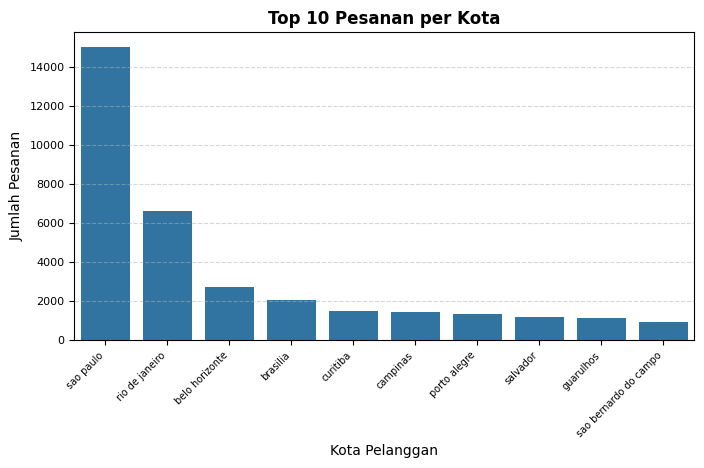

In [36]:
# Visualisasi Top 10 kota dengan pesanan terbanyak

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x="customer_city", y="order_count", data=top_10_cities_orders)

# Labels & Title
plt.title("Top 10 Pesanan per Kota", fontweight="bold")
plt.xlabel("Kota Pelanggan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45, fontsize=7, ha="right")
plt.yticks(fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout

# Show
plt.show()

In [37]:
# Menghitung seluruh negara bagian dengan jumlah pesanan terbanyak dan paling sedikit

state_orders = customers_in_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index(name="order_count")
print(state_orders)

   customer_state  order_count
0              SP        40495
1              RJ        12353
2              MG        11355
3              RS         5344
4              PR         4923
5              SC         3547
6              BA         3256
7              DF         2080
8              ES         1995
9              GO         1957
10             PE         1593
11             CE         1279
12             PA          946
13             MT          886
14             MA          717
15             MS          701
16             PB          517
17             PI          476
18             RN          474
19             AL          397
20             SE          335
21             TO          274
22             RO          243
23             AM          145
24             AC           80
25             AP           67
26             RR           41


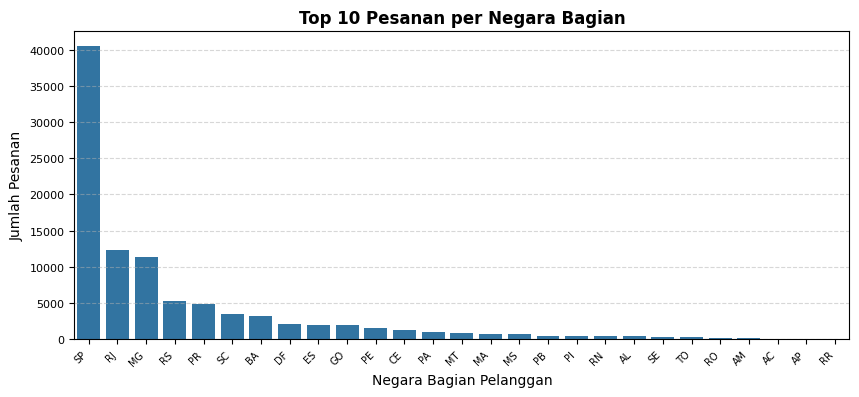

In [38]:
# Visualisasi data negara bagian berdasarkan jumlah pesanan

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x="customer_state", y="order_count", data=state_orders)

# Labels & Title
plt.title("Top 10 Pesanan per Negara Bagian", fontweight="bold")
plt.xlabel("Negara Bagian Pelanggan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45, fontsize=7, ha="right")
plt.yticks(fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout

# Show
plt.show()

**Insight:**
- Berdasarkan data, Sao Paulo (SP) adalah kota dengan jumlah pesanan terbanyak, yaitu 15.046 pesanan, diikuti oleh Rio de Janeiro (RJ) (6.604 pesanan) dan Belo Horizonte (MG) (2.697 pesanan).
- Jika dilihat berdasarkan negara bagian, São Paulo (SP) mendominasi dengan 40.495 pesanan, jauh lebih tinggi dibandingkan Rio de Janeiro (RJ) (12.353 pesanan) dan Minas Gerais (MG) (11.355 pesanan).

### Pertanyaan 2: Bagaimana tren pesanan terlaris dan paling sedikit terjual berdasarkan kategori produk?

In [39]:
# Menghitung top 5 kategori produk terlaris

top_5_category_product_orders = product_category_in_order_items_df.groupby("product_category_name_english").order_id.nunique().sort_values(ascending=False).head(5).reset_index(name="order_count")
print(top_5_category_product_orders)

  product_category_name_english  order_count
0                bed_bath_table         9272
1                 health_beauty         8649
2                sports_leisure         7530
3         computers_accessories         6529
4               furniture_decor         6307


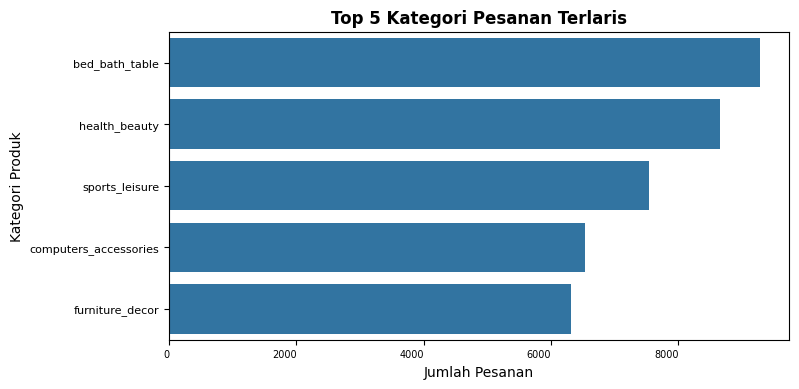

In [40]:
# Plot
plt.figure(figsize=(8, 4))
sns.barplot(y="product_category_name_english", x="order_count", data=top_5_category_product_orders)

# Labels & Title
plt.title("Top 5 Kategori Pesanan Terlaris", fontweight="bold")
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Kategori Produk")
plt.xticks(fontsize=7, ha="right")
plt.yticks(fontsize=8)
plt.tight_layout

# Show
plt.show()

In [41]:
# Menghitung top 5 kategori paling sedikit terjual

bottom_5_category_product_orders = product_category_in_order_items_df.groupby("product_category_name_english").order_id.nunique().sort_values(ascending=False).tail(5).reset_index(name="order_count")
print(bottom_5_category_product_orders)

  product_category_name_english  order_count
0         arts_and_craftmanship           23
1                    la_cuisine           13
2             cds_dvds_musicals           12
3     fashion_childrens_clothes            7
4         security_and_services            2


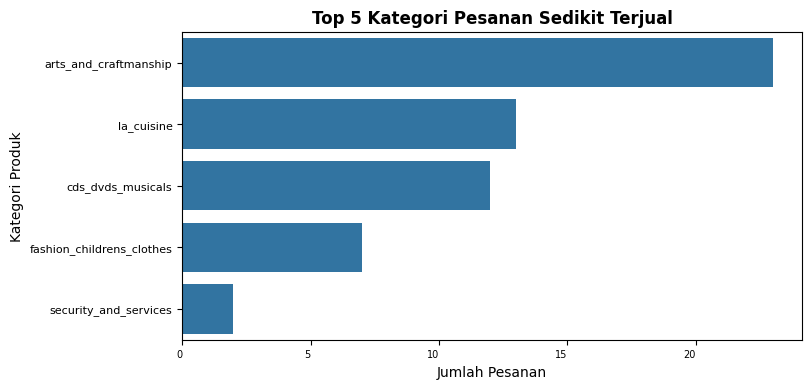

In [42]:
# Plot
plt.figure(figsize=(8, 4))
sns.barplot(y="product_category_name_english", x="order_count", data=bottom_5_category_product_orders)

# Labels & Title
plt.title("Top 5 Kategori Pesanan Sedikit Terjual", fontweight="bold")
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Kategori Produk")
plt.xticks(fontsize=7, ha="right")
plt.yticks(fontsize=8)
plt.tight_layout

# Show
plt.show()

**Insight:**
- Kategori produk dengan penjualan tertinggi adalah Bed Bath Table (9.272 pesanan), diikuti dengan Health & Beauty (8.649 pesanan), dan Sports & Leisure (7.530 pesanan)
- Kategori dengan penjualan paling sedikit adalah Security & Services (2 pesanan), diikuti dengan Fashion Children's Clothes (7 pesanan), dan CDs, DVDs, & Musicals (12 pesanan)

## Conclusion

**Conclusion Pertanyaan 1**
- Tren pesanan menunjukkan bahwa wilayah dengan populasi besar dan kota metropolitan memiliki jumlah pesanan lebih tinggi.
- São Paulo (SP) menjadi pusat transaksi utama, kemungkinan besar karena infrastruktur e-commerce yang lebih baik dan jumlah penduduk yang tinggi.

**Conclusion Pertanyaan 2**
- Produk keperluan rumah tangga, kesehatan, olahraga, dan teknologi memiliki permintaan tinggi, menunjukkan preferensi pelanggan terhadap kebutuhan sehari-hari dan gaya hidup.
- Produk dengan permintaan rendah seperti seni, musik, dan pakaian anak-anak kemungkinan disebabkan oleh segmentasi pasar yang lebih kecil dan perubahan tren konsumsi.
- Kategori Security & Services memiliki penjualan paling sedikit, yang bisa jadi karena pembelian produk terkait keamanan lebih jarang terjadi di e-commerce dibandingkan toko fisik.